#     Assignment 1: Classifying Forest Cover Type
Selim Karaoglu  
karaoglu@hawaii.edu

## Introduction
In this paper, we analyze the Forest Cover Dataset provided by UCI, build numerous classifiers to classify the forest cover type of a parcel of land, and evaluate the performance of the classifiers. To achieve this goal, we applied a step by step approach to the problem and explained the process thoroughly. We start the process with the data preprocessing. After adding id column and headers to the data in MS Excel, the data is stored in a "Comma Seperated Value" (.csv file) format. Following, definition of the libraries used in this project are provided. After applying data processing to the dataFrame, we examined and explained some features about the data that is crucial in the classification processes. In this process; plot of the data, correlation in the data columns, distribution of the data are the main focus. Furthermore, data is classified by different classifiers and these classifiers are cross validated with several hyperparameters to find the best tuning for each classifier. Afterwards we trained the classifiers with best hyperparameters and tested the performance on data. Finally we compared and analyzed the results.

## Data Preprocessing
This project uses Forest Cover Dataset provided by UCI, this dataset contains 581011 rows of data and 55 columns of attributes for each row. These attributes are:
    * Elevation / quantitative /meters / Elevation in meters
    * Aspect / quantitative / azimuth / Aspect in degrees azimuth
    * Slope / quantitative / degrees / Slope in degrees
    * Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
    * Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
    * Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
    * Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
    * Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
    * Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
    * Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
    * Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
    * Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
    * Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
Before importing the data, we added a unique ID column to the dataset and added headers to make the dataset clearer. All these actions applied using MS Excel. This file is exported in .csv format in the data folder as data.csv. For this process, a python library called pandas is used.

In [1]:
#Libraries used in the project

import numpy as np
import scipy as sc
import pandas as pd #to import data
import matplotlib
import matplotlib.pyplot as plt #to plot data
import seaborn as sns #to violinplot the distributions, pairplot the attributes
from collections import Counter
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

## Dataset

After importing dataset in dataFrame format, we converted the data in several other formats for ease of processing. To be clearer:
    * Dataset in dataFrame format
    * Dataset in numpy array format
    * Dataset in numpy array format with permutation
    * Dataset with only continuous columns
    * Target labels in numpy array format
    * Dataset splitted into train and test sets in numpy array format.
There are some further changes on data used for classification processes. These changes are explained in the process.  
If we look at the dataset:

In [2]:
# data = Original dataset in dataFrame format with header column and id attribute
data = pd.read_csv("data/data.csv")
# d = data in numpy array format
d = np.asarray(data)
# permuteddata = d permuted in numpy array format
permuteddata = np.random.permutation(d)
# X = permuteddata without id and other non-continuous columns
X = permuteddata[:,1:10]
# y = targets, Cover_type column in permuteddata
y = permuteddata[:,55]
# with StratifiedShuffleSplit data distribution is preserved.
for tr_i, te_i in StratifiedShuffleSplit(n_splits = 10, test_size = 0.33, random_state = 42).split(X,y):
    X_train, X_test = X[tr_i], X[te_i]
    y_train, y_test = y[tr_i], y[te_i]

#Datasets for plotting decision boundaries on axes 4-5 and 7-9
X2 = permuteddata[:, [4,5]]
X3 = permuteddata[:, [7,9]]
y2 = y
y3 = y
X2 = StandardScaler().fit(X2).transform(X2)
X3 = StandardScaler().fit(X3).transform(X3)
for tr_i, te_i in StratifiedShuffleSplit(n_splits = 10, test_size = 0.33, random_state = 42).split(X2,y2):
    X2_train, X2_test = X2[tr_i], X2[te_i]
    y2_train, y2_test = y2[tr_i], y2[te_i]
for tr_i, te_i in StratifiedShuffleSplit(n_splits = 10, test_size = 0.33, random_state = 42).split(X3,y3):
    X3_train, X3_test = X3[tr_i], X3[te_i]
    y3_train, y3_test = y3[tr_i], y3[te_i]
    
#First 5 elements of the data
data.head()

C:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


The code below prints the shapes of varied data used in the process. After we imported data and permuted the rows, we excluded the id, wilderness_area (4 columns), soil_types and cover_type (as we used as target). Hence X has a shape of (581012, 9) with header column included.

In [15]:
#Shapes of the data arrays used in this project as reference
print(d.shape)
print(permuteddata.shape)
print(X.shape)
print(X2.shape)
print(X3.shape)
print(y.shape)
print(X_train.shape)
print(X2_train.shape)
print(X2_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X2_test.shape)
print(X3_test.shape)
print(y_test.shape)

(581012, 56)
(581012, 56)
(581012, 9)
(581012, 2)
(581012, 2)
(10,)
(389278, 9)
(389278, 2)
(389278, 2)
(389278,)
(191734, 9)
(191734, 2)
(191734, 2)
(191734,)


In [4]:
#Unique data types in the dataset
l = list(set(data.dtypes))
l

[dtype('int64')]

Above code prints all the unique types in the dataset. Every attribute type is integer in this dataset.  

We plotted the dataset with Horizontal Distance To Hydrology on x axis and Vertical Distance To Hydrology on y axis.

More detailed information about the data is provided by .describe() function of pandas library.

In [5]:
pd.set_option('display.max_columns', None)
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,290506.500000,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,167723.861639,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,145253.750000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,290506.500000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

There are several inferences about the dataset description:
    * Count for each column are the same (581012), there is no missing data.
    * Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis. (This step is not applied because it's not significant for the goals of the project)
    * Scales are not the same for all attributes, rescaling and standardisation may be necessary for some algorithms.

To provide a better insight to the data, we examined the correlation between the attributes of data.

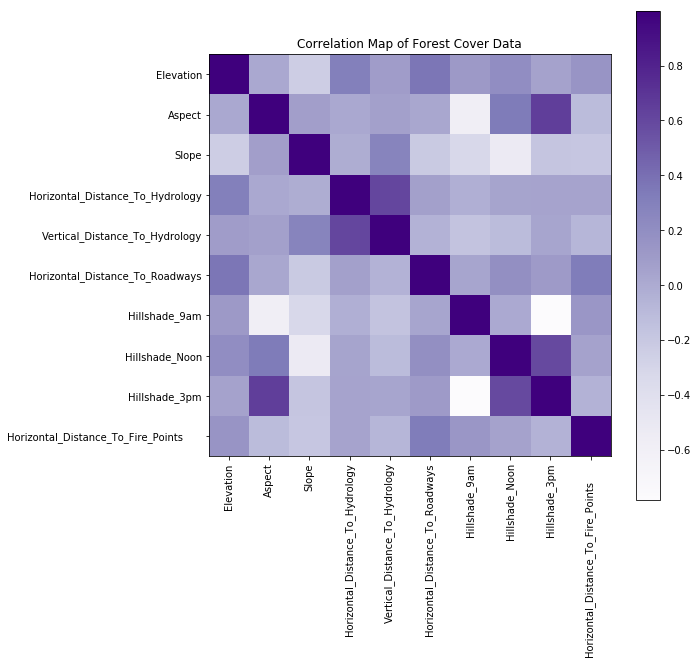

In [6]:
def plot_corr(df,size=11):
    corr = df.iloc[:,1:size].corr()
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.tick_params(axis="x", labelrotation=90)
    plt.title("Correlation Map of Forest Cover Data")
    plt.imshow(corr, cmap=plt.cm.Purples, interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(data, size=11)

After we plot the correlation between the continuous values in the dataset, it is easier to see the correlations. As can be observed from the plot;
    * Aspect and Hillshade_3pm
    * Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology
    * Hillshade_Noon and Hillshade_3pm has positive correlation in between and
    * Aspect and Hillshade_9am 
    * Slope and Hillshade_Noon has negative correlation in between.  
If we sort these correlations and filter them with a threshold of 0.5, we can get the strong correlations list of our attributes.

In [7]:
#Get the columns of the data
cols = data.columns
#Correlation
dcorr = data.corr()
corrs = []
#Threshold set .5, looking for high correlation values only
t = 0.5
size=10
#Sorting out the highly correlated values
for i in range(0, size):
    for j in range(i+1, size):
        if dcorr.iloc[i,j]>= t and dcorr.iloc[i,j]<1\
        or dcorr.iloc[i,j] <0 and dcorr.iloc[i,j]<=-t:
            corrs.append([dcorr.iloc[i,j],i,j])
            
#Sorting things out
sortedcorrs = sorted(corrs,key= lambda x: -abs(x[0]))

#Print the higher values
for v,i,j in sortedcorrs:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


Since we spotted the high correlations, we can plot the distributions with pairplot function. These plots are pairwise scatter plots to observe the data distribution on two dimensional plot. Each datapoint is colored by its cover_type attribution.

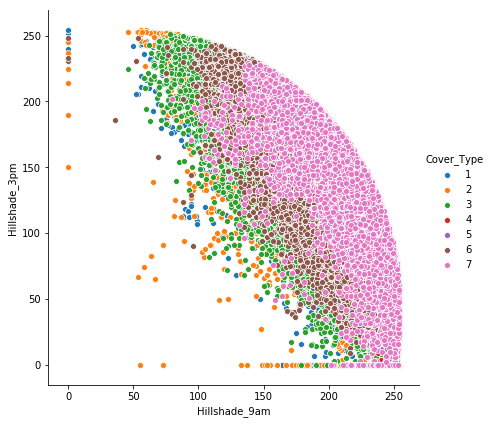

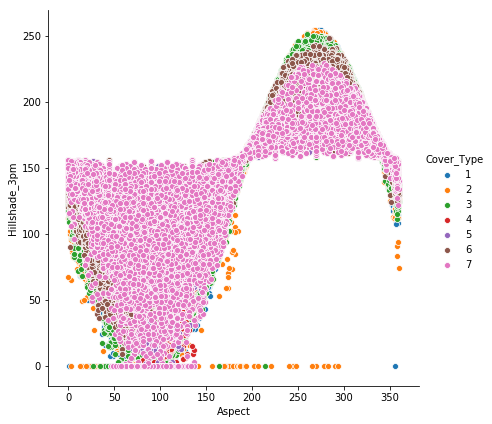

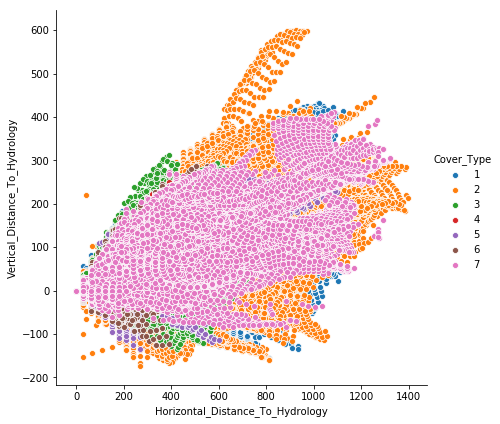

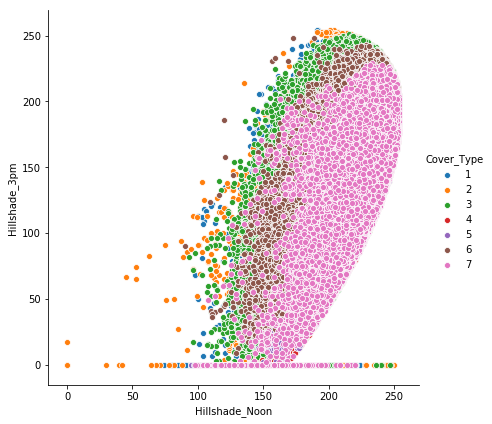

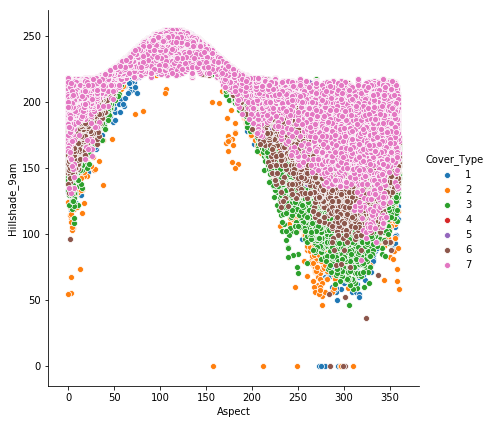

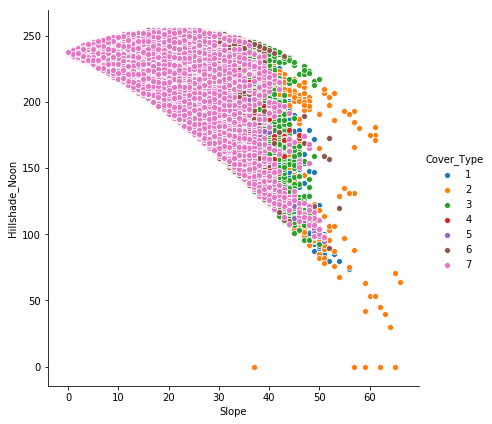

In [47]:
#Pair plots of the continuous data attributes
for v,i,j in sortedcorrs:
    sns.pairplot(data, hue="Cover_Type", height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

Two of these plots show more distinctive distribution comparing the others, which are Vertical vs Horizontal Distance to Hydrology and Hillshade 9am vs 3pm. We later used these data to plot the decision boundaries of classifiers.  
Last step on data examination is to see the distributions of each label on cover_type. These graphs can provide information on how data is distributed and which attributes show significance in our dataset.

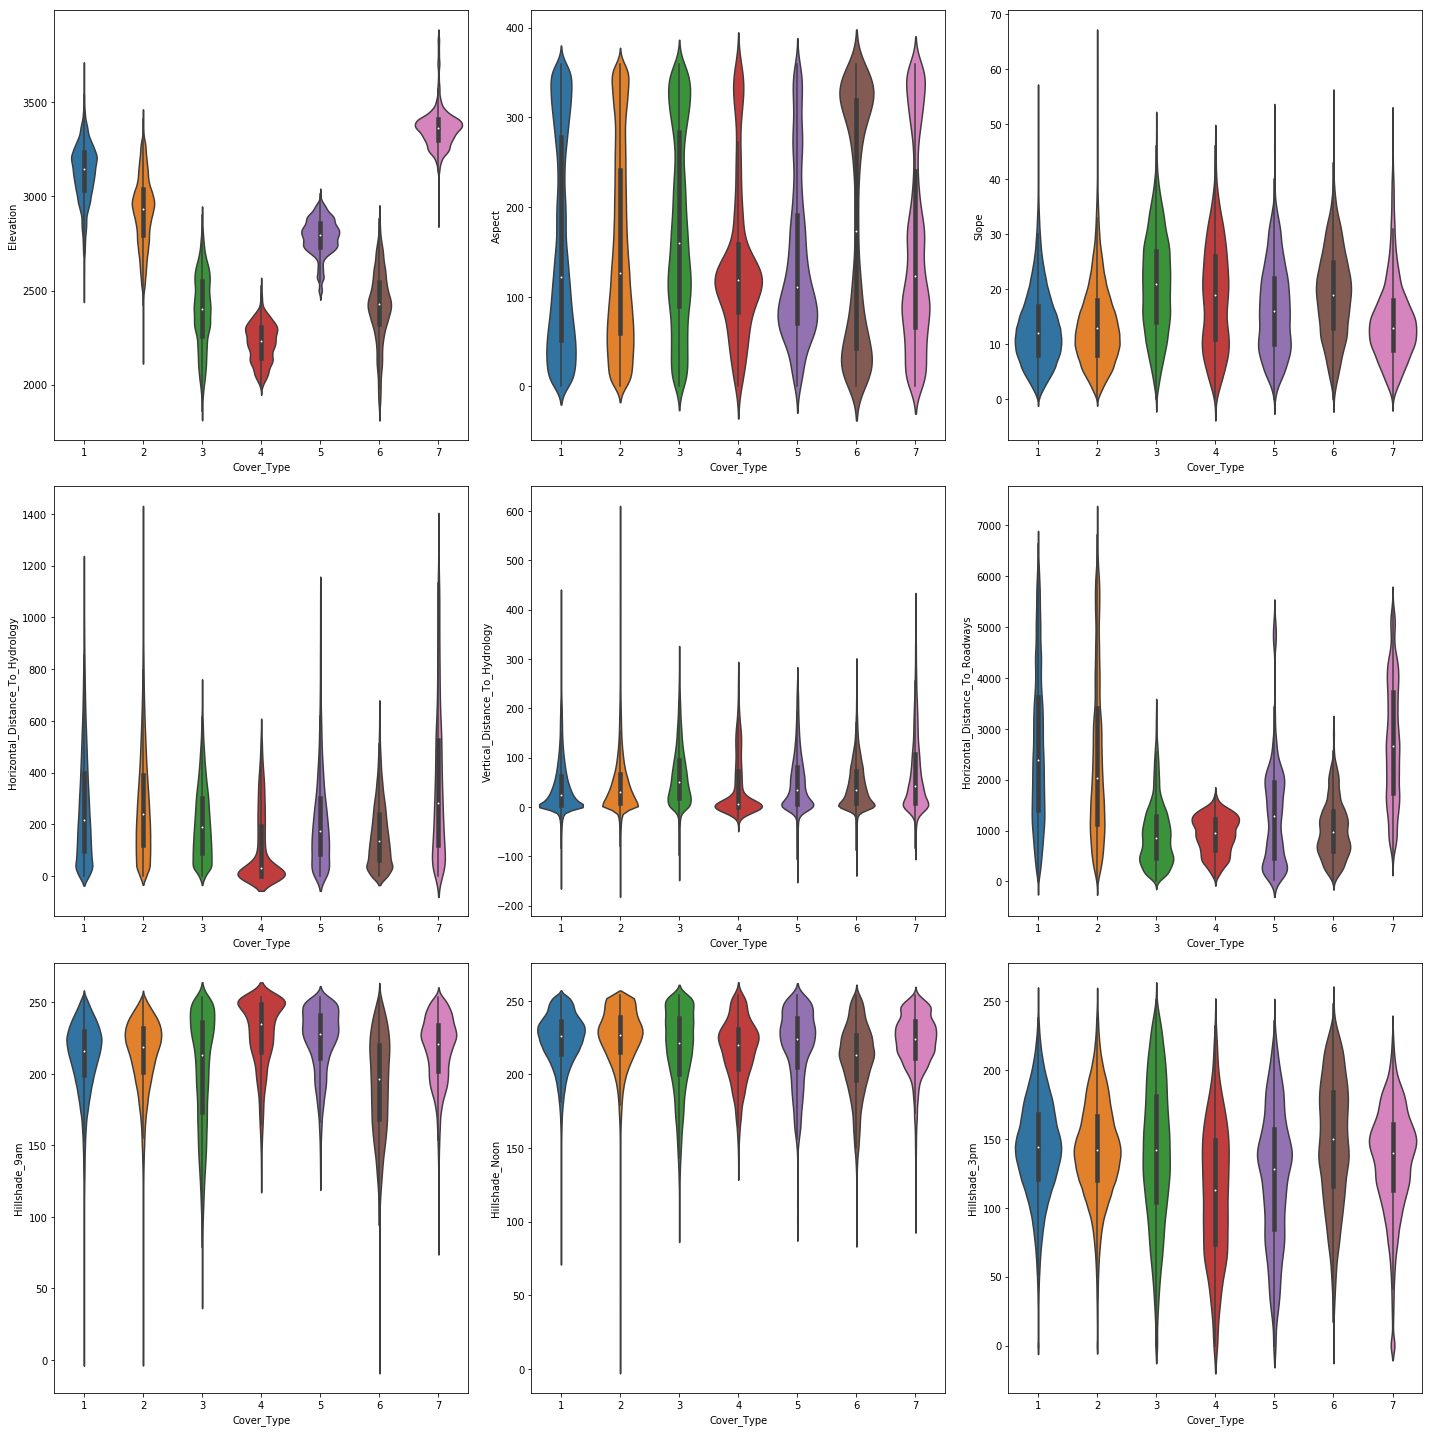

In [38]:
#x and y axes of the plot
x = cols[55]
y = cols[1:11]
fig = plt.figure(figsize=(20,20))
for i in range(1, 10):
    ax = plt.subplot(3, 3, i)
    sns.violinplot(data=data, x=x, y=y[i-1])
plt.tight_layout()
plt.show()

When these graphs are examined, significant observations are;
    * Elevation has a seperate distribution for each class, hence an important attribute for prediction.
    * Aspect contains couple of normal distribution for several classes.
    * Horizontal distance to hydrology and roadways are quite similar to each other.

Next we plot the permuted dataset labels, training labels and test labels distribution. Since we used StratifiedShuffleSplit library, all the distributions are the same. With providing the distribution plots we finalize the data examination.

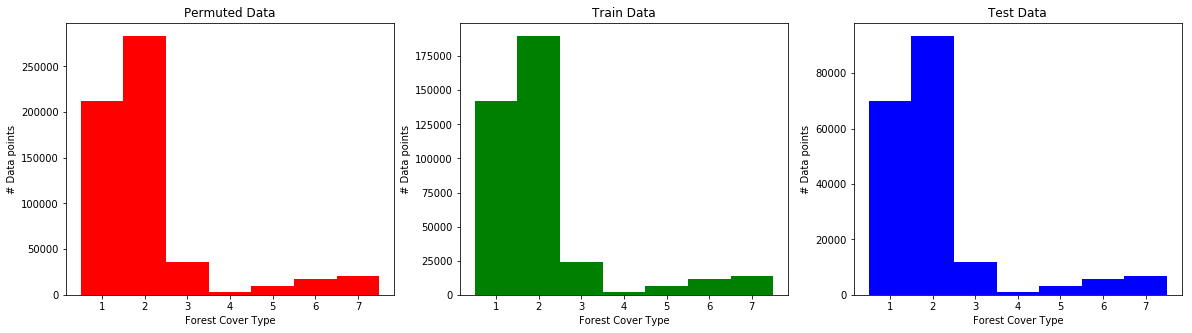

In [10]:
def plotHists(dataset):
    fig = plt.figure(figsize=(20,5))
    c = ["red", "green", "blue"]
    for i in range(len(dataset)):
        plt.subplot(1, 3, i+1)
        histogram = Counter(dataset[i])
        v = list(histogram.values())
        plt.title(t[i])
        plt.bar([fc for fc in histogram.keys()],v,1, color=c[i])
        plt.xlabel("Forest Cover Type")
        plt.ylabel("# Data points")

a = [permuteddata[:,55], y_train, y_test]
t = ["Permuted Data", "Train Data", "Test Data"]
plotHists(a)
plt.show()

## Classification
The analysis of the dataset showed that the target values are the cover_type attribute in the dataset and we can ingore the non-continuous attributes in the data. To classify the data, we used five different classifiers; K Nearest Neighbors, Decision Tree Classifier, Random Forest Classifier, Gaussian Naive Bayes Classifier and Extra Tree Classifier. These classifiers work with different algorithms and tuned by different number of hyperparameters. To find the best tuning of each classifier, we used the code below. We limited the train size to 10000 due to processing power and time limitations. The output is the accuracy and cross validation scores for each classifier.

In [18]:
#First we train the classifiers without any tuning, default values
knn = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
gnb = GaussianNB()
etc = ExtraTreesClassifier(n_estimators=100)
classifiers = [knn, dtc, rfc, gnb, etc]
clfnames = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Naive Bayes", "Extra Tree"]
for c, n in zip(classifiers, clfnames):
    clf = c.fit(X_train[:10000], y_train[:10000])
    print(n + " Scores:")
    print("Accuracy = " + str(clf.score(X_test, y_test)))
    print(cross_val_score(clf, permuteddata[:,1:10], permuteddata[:,55], cv=5))

K Nearest Neighbors Scores:
Accuracy = 0.7144846506096989
[0.91626006 0.91591511 0.91555223 0.91474256 0.91456971]
Decision Tree Scores:
Accuracy = 0.6574577278938529
[0.86014371 0.86191525 0.86307465 0.86186866 0.86052496]
Random Forest Scores:
Accuracy = 0.7479059530391062
[0.90634654 0.90632853 0.90653345 0.90636914 0.9067642 ]
Naive Bayes Scores:
Accuracy = 0.6389737866001857
[0.64462803 0.64135486 0.64165849 0.64255901 0.64236661]
Extra Tree Scores:
Accuracy = 0.750070410047253
[0.89785293 0.89477126 0.89519974 0.89789244 0.89643718]


#### Cross Validation for performance optimization
To find the best performing hyperparameters for each classifier, we applied a cross validation on different hyperparameters of each classifier. Output is best performing hyperparameters for the classifiers. In this cross validation process, hyperparameters used for each kernel:
    * K Nearest Neigbors:
        - Number of neighbors; 1, 3, 5, 7, 10
        - Leaf size; 10, 30, 50
    * Decision Tree:
        - Maximum depth; 5, 10, 15
        - Minimum split samples; 2, 5, 10
        - Minimum leaf samples; 1, 3
    * Random Forest:
        - Number of estimators; 50, 100
        - Maximum depth; 5, 10, 15
        - Maximum features; 0.1, 0.3
        - Minimum leaf samples; 1, 3
    * Naive Bayes does not contain hyperparameters to tune
    * Extra Tree:
        - Maximum depth; 5, 10, 15
        - Minimum split samples; 2, 5, 10
        - Minimum leaf samples; 1, 3.  
We limited the number of values for each parameter since cross validation takes decent amount of time to execute. This project has limitations and computation power is one of them. We still applied the most important hyperparameters and some significant values for each. In a more detailed cross validation, there might be better performing hyperparameters, but we will use the results of the projects own cross validation.

In [22]:
#We define the hyperparameters and respected values to cross validate
knnp = [{"n_neighbors":[1,3,5,7,10], "leaf_size":[10,30,50]}]
dtcp = [{"max_depth":[5,10,15], "min_samples_split":[2,5,10], "min_samples_leaf":[1,3]}]
rfcp = [{"n_estimators":[50,100], "max_depth":[5,10,15], "max_features":[0.1, 0.3], "min_samples_leaf":[1,3]}]
gnbp = [{"priors":[None]}]#Naive Bayes does not contain any hyperparameter to tune
etcp = [{"max_depth":[5,10,15], "min_samples_split":[2,5,10], "min_samples_leaf":[1,3]}]
params = [knnp, dtcp, rfcp, gnbp, etcp]
#StratifiedShuffleSplit used for cross validation split
spl = StratifiedShuffleSplit(n_splits = 3, test_size = 0.33, random_state = 42)
for c, p, n in zip(classifiers, params, clfnames):
    clf = GridSearchCV(c, param_grid=p, cv=spl, n_jobs=-1)
    clf.fit(X_train, y_train)
    print(n + " Cross Validation Scores:")
    print ("Best accuracy obtained: {}".format(clf.best_score_))
    print ("Parameters:")
    for key, value in clf.best_params_.items():
        print("\t{}:{}".format(key,value))

K Nearest Neighbors Cross Validation Scores:
Best accuracy obtained: 0.8950091596477298
Parameters:
	leaf_size:50
	n_neighbors:1
Decision Tree Cross Validation Scores:
Best accuracy obtained: 0.7942660086251188
Parameters:
	max_depth:15
	min_samples_leaf:1
	min_samples_split:2
Random Forest Cross Validation Scores:
Best accuracy obtained: 0.7951715941938732
Parameters:
	max_depth:15
	max_features:0.3
	min_samples_leaf:1
	n_estimators:100
Naive Bayes Cross Validation Scores:
Best accuracy obtained: 0.6424649572117306
Parameters:
	priors:None
Extra Tree Cross Validation Scores:
Best accuracy obtained: 0.7604816988681478
Parameters:
	max_depth:15
	min_samples_leaf:1
	min_samples_split:5


Above outputs show the best performing hyperparameter values for each classifier. Furthermore, we use these hyperparamter values to train the classifiers again with their best performance.  
#### Training the Classifiers
Now we train the classifiers on training data with their best performing hyperparameters.

In [23]:
scores = []
knn = KNeighborsClassifier(leaf_size=50, n_neighbors=1)
dtc = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2)
rfc = RandomForestClassifier(max_depth=15, max_features=0.3, min_samples_leaf=1, n_estimators=100)
gnb = GaussianNB(priors=None)
etc = ExtraTreesClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=5)
#Models list
models = [knn, dtc, rfc, gnb, etc]
for c in models:
    clf = c.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    scores.append(s)
    print(clf)
    print("Accuracy (Optimized): " + str(s))

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
Accuracy (Optimized): 0.9067197262874608
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Optimized): 0.8003744771402047
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            w

C:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=15, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Accuracy (Optimized): 0.75630821867796


#### Classification Results
Now we can get predictions on test data and plot the classification result scores for classifiers. First we examine the training results. The bar chart below shows the training score of the optimized classifiers.

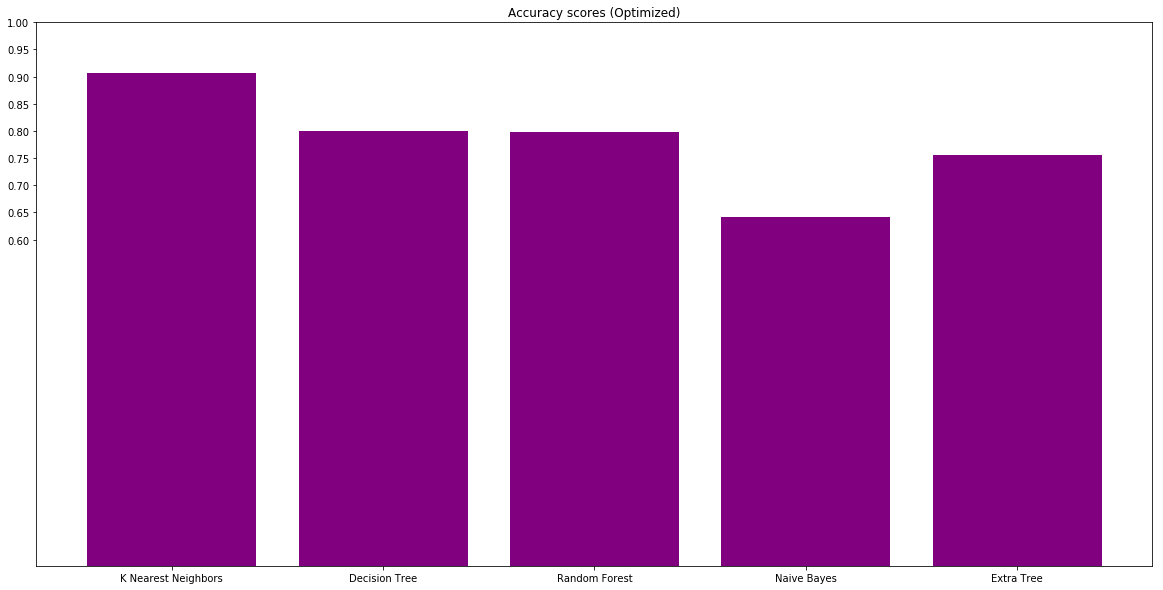

In [24]:
#Plotting the Accuracy scores of classifiers
plt.figure(figsize=(20,10))
plt.title("Accuracy scores (Optimized)")
#Using bar function to plot results on a bar chart
plt.bar(clfnames, scores, color="purple")
plt.yticks(np.linspace(0.6, 1, num=9, endpoint=True))
plt.show()

In [25]:
#Define target names for a clear looking table output
target = ["class1", "class2", "class3", "class4", "class5", "class6", "class7"]

#Predicting the test data and saving the predictions
y_pred_knn = knn.predict(X_test)
print (classification_report(y_test, y_pred_knn, target_names=target))
y_pred_dtc = dtc.predict(X_test)
print (classification_report(y_test, y_pred_dtc, target_names=target))
y_pred_rfc = rfc.predict(X_test)
print (classification_report(y_test, y_pred_rfc, target_names=target))
y_pred_gnb = gnb.predict(X_test)
print (classification_report(y_test, y_pred_gnb, target_names=target))
y_pred_etc = etc.predict(X_test)
print (classification_report(y_test, y_pred_etc, target_names=target))

predictions = [y_pred_knn, y_pred_dtc, y_pred_rfc, y_pred_gnb, y_pred_etc]

              precision    recall  f1-score   support

      class1       0.90      0.91      0.90     69907
      class2       0.92      0.92      0.92     93489
      class3       0.90      0.91      0.90     11799
      class4       0.84      0.81      0.83       907
      class5       0.77      0.78      0.78      3133
      class6       0.83      0.83      0.83      5731
      class7       0.93      0.92      0.92      6768

   micro avg       0.91      0.91      0.91    191734
   macro avg       0.87      0.87      0.87    191734
weighted avg       0.91      0.91      0.91    191734

              precision    recall  f1-score   support

      class1       0.79      0.80      0.79     69907
      class2       0.82      0.84      0.83     93489
      class3       0.77      0.80      0.78     11799
      class4       0.77      0.68      0.72       907
      class5       0.74      0.39      0.51      3133
      class6       0.67      0.51      0.58      5731
      class7       0.84 

Examining the results show us the best performance is provided by K Nearest Neighbor Classification with 0.91 precision score. Decision Tree and Random Forest classifiers scored close to each other around value of 0.8. Extra Tree classifier resulted with 0.75 precision score and finally Naive Bayes has the worst precision score with 0.64.

#### Learning Curves

We use learning curves to split data in several different train - test splits and observe the classifiers performance in these different dataset splits. To plot the learning curves, first we use the learning_curve function and save the results.

In [26]:
#Assigning titles for each classifier
titles = ["Learning Curve (K Nearest Neighbors)", "Learning Curve (Decision Tree)",\
          "Learning Curve (Random Forest)", "Learning Curve (Naive Bayes)", "Learning Curve (Extra Tree)"]
#StratifiedShuffleSplit used to leep data integrity in each split
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#Learning curve results for each classifier assigned to a list, for plotting
lc_res = []
for c in models:
    train_sizes, train_score, test_score = learning_curve(c, X_train, y_train, cv = cv,\
                                            n_jobs=1, train_sizes=np.linspace(0.1, 1, 10))
    lc_res.append([train_sizes, train_score, test_score])

After we obtained the learning curves, we can plot the training and test scores with the error rates and compare visually.

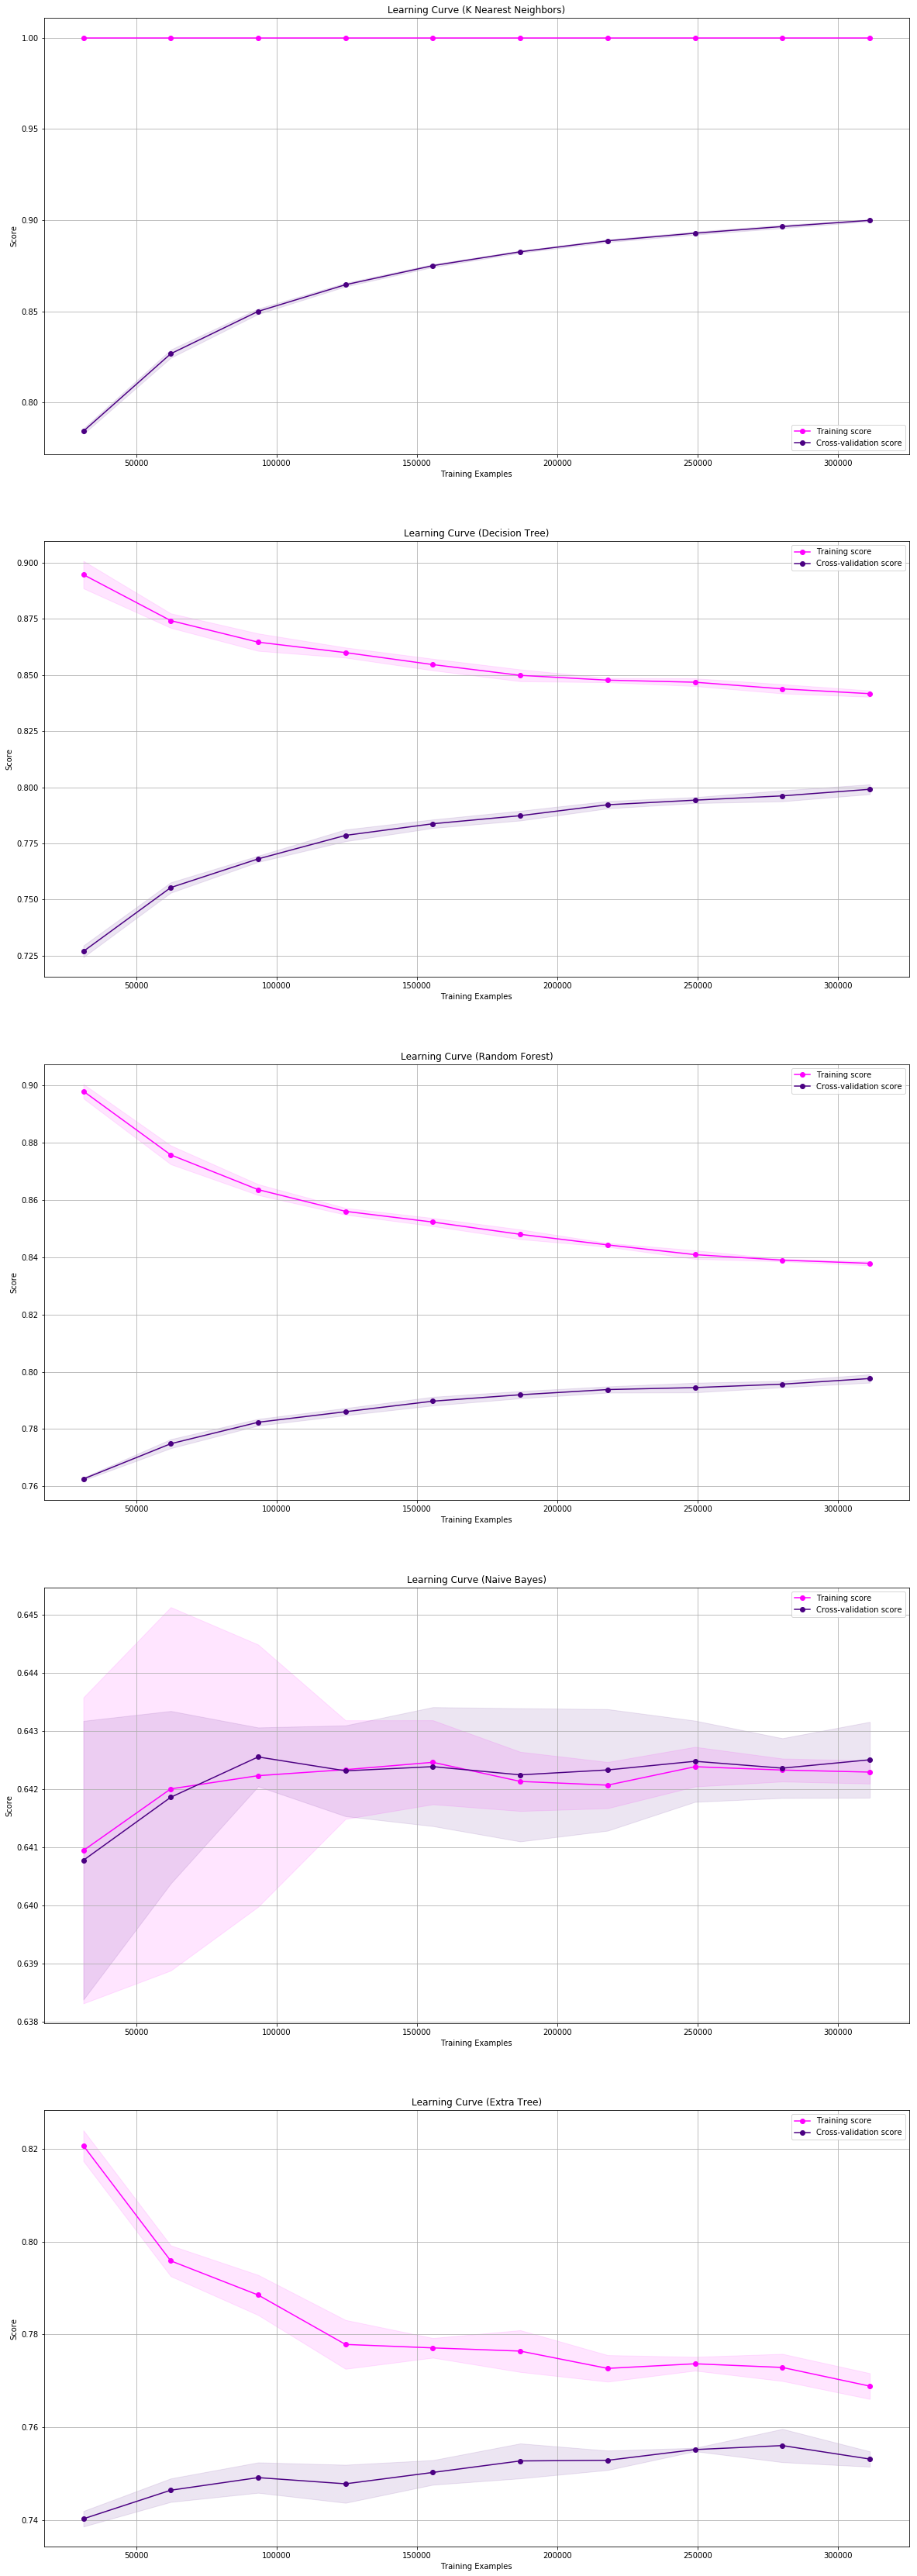

In [28]:
i=0
fig = plt.figure(figsize=(20, 60))

for t,l in zip(titles, lc_res):
    
    train_sizes, train_score, test_score = l
    #Calculate mean and std for error rate
    train_score_mean = np.mean(train_score, axis=1)
    train_score_std = np.std(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    test_score_std = np.std(test_score, axis=1)
    ax = plt.subplot(511 + i)
    ax.set_title(t)
    
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std,\
                    alpha = 0.1, color = "magenta")
    ax.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std,\
                    alpha = 0.1, color = "indigo")
    
    ax.plot(train_sizes, train_score_mean, "o-", color="magenta", label="Training score")
    ax.plot(train_sizes, test_score_mean, "o-", color="indigo", label="Cross-validation score")
    
    ax.legend(loc = "best")
    i= i+1       
    
plt.show()

All 5 classifiers' learning curves are plotted above. The common and expectable feature is; test scores increase as training size grows in size. At the end of the training, the highest scorer is K Nearest Neighbors with 0.9 score. Decision Tree and Random Forest are following with 0.8, Extra Tree with 0.76 and Naive Bayes with 0.64. These scores are pretty consistent with our previous results. Naive Bayes learning curves show that training size does not effect the score significantly, all the other classifiers responded with higher scores as training size increase.

### Decision Boundaries of classifiers

By far, we trained our classifiers, tested them and plotted the learning rates. Final step of our project is to plot the decision boundaries of the classifiers, because they look like pop-art paintings. We used the Vertical vs. Horizontal Distance to Hydrology and Hillshade 9am vs 3pm attributes to plot the data. We trained the classifiers again and plot the predictions on attributes as axes.

In [29]:
#Training the classifiers and getting scores
scores2 = []
scores3 = []
for c in models:
    clf = c.fit(X2_train, y2_train)
    s = clf.score(X2_test, y2_test)
    scores2.append(s)
    clf = c.fit(X3_train, y3_train)
    s = clf.score(X3_test, y3_test)
    scores3.append(s)

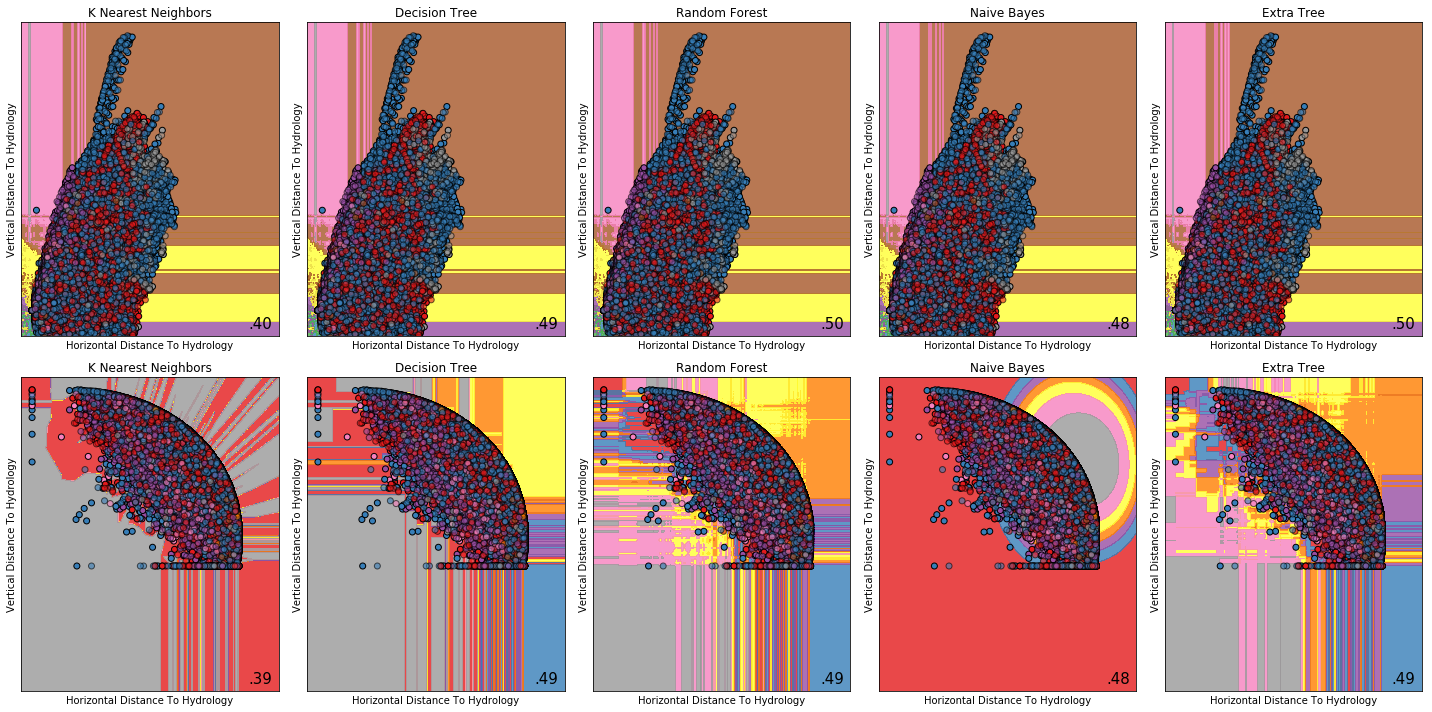

In [33]:
#Plotting the decision boundaries for each classifier
fig = plt.figure(figsize=(20,10))
h = .02  #Meshgrid step size
#Axis limits defined with min and max values in the dataset
x_min, x_max = X2[:,0].min() - .5, X2[:,1].max() + .5
y_min, y_max = X2[:,0].min() - .5, X2[:,1].max() + .5
#Creating the meshgrid with axis sizes
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Color maps
cm = plt.cm.Set1
cm_bright = plt.cm.Set1
j=1
#Iteration over classifiers for horizontal-vertical distance on axes
for p, n, s in zip(predictions, clfnames, scores2):
    #Subplot with 2 rows and 5 columns
    ax = plt.subplot(2, 5, j)
    #Prediction
    Z = c.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X2_train[:,0], X2_train[:,1], c=y2_train[:] , cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X2_test[:,0], X2_test[:,1], c=y2_test[:], cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Horizontal Distance To Hydrology")
    ax.set_ylabel("Vertical Distance To Hydrology")
    ax.set_title(n)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ("%.2f" % s).lstrip("0"),
            size=15, horizontalalignment="right")
    j += 1

#Second row iteration over classifiers for Hillshade9-Hillshade3 on axes
x_min, x_max = X3[:,0].min() - .5, X3[:,1].max() + .5
y_min, y_max = X3[:,0].min() - .5, X3[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Same drill, second row    
for c, n, s in zip(models, clfnames, scores3):
    ax = plt.subplot(2, 5, j)    
    Z = c.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X3_train[:,0], X3_train[:,1], c=y3_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X3_test[:,0], X3_test[:,1], c=y3_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Horizontal Distance To Hydrology")
    ax.set_ylabel("Vertical Distance To Hydrology")
    ax.set_title(n)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ("%.2f" % s).lstrip("0"),
            size=15, horizontalalignment="right")
    j += 1

plt.tight_layout()
plt.show()

## Summary

In this project, we worked on the forest cover type data. We started the process with examining the data, preprocessing to get the data in shape. Observing the correlations between attributes provided an insight about the data and we designed the further progress with the information. We trained five different classifiers. These are; K Nearest Neighbors, Decision Tree, Random Forest, Naive Bayes and Extra Tree Classifiers. We trained the classifiers without any tuning on test data first. The score results of this step remained similar for the rest of this work. We cross validated the numerous hyperparameters for each classifier and obtained the best performance tuning for each parameter. Further we trained the fine tuned classifiers and tested them. Plotted the results and learning curves for each classifier. Results showed us the best performing classifier is K Nearest Neighbors.